# Transient Partial Differential Equation
writen by Abhijeet Parida(a_parida@outlook.com)
## Introduction

Partial differential equations ([PDEs](https://en.wikipedia.org/wiki/Partial_differential_equation))are equations that involve rates of change with respect to continuous variables. Classic domains where PDEs are used include acoustics, fluid dynamics, electrodynamics, and heat transfer.

Now, we generalize to the instationary heat equation

<p style="text-align: center;"> $T_t = T_{xx} + T_{yy}$ </p>
on the unit square $]0; 1[^2$ with the temperature T, the two-dimensional coordinates x and y, the time t, homogeneous Dirichlet boundary conditions
<p style="text-align: center;"> $T(x, y, t) = 0$  forall $(x, y)$ in $ ∂]0; 1[^2$; $t$ in $]0; ∞[$</p>
and
<p style="text-align: center;">$T(x, y, 0) = 1.0$ forall $(x, y)$ in $]0; 1[^2$</p>
as initial condition.


For the spatial discretization, we again use the grid points
$ \{(x_i, y_j ) = (i ·\frac{1}{h_x}, j ·\frac{1}{h_y}) 	\forall i = 0, 1, . . . , N_x, N_x + 1; j = 0, 1, . . . , Ny, Ny + 1\}$


and the finite difference approximation of the second derivatives
<p style="text-align: center;">$T_{xx|i,j}\approx \frac{T_{i−1,j} − 2T_{i,j} + T_{i+1,j}}{h_x^2}$</p>
and
<p style="text-align: center;">$T_{yy|i,j}\approx \frac{T_{i,j-1} − 2T_{i,j} + T_{i,j+1}}{h_y^2}$</p>
for $i = 1, . . . , N_x$, $j = 1, . . . , N_y$ with $h_x =\frac{1}{N_x+1}$ and $h_y =\frac{1}{N_y+1}$

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [67]:
#Boundary of the PDE 
left=0
right= 1

down=0
up= 1

In [76]:
N =[3,7,31] # number of division for x
dt_all=[1/64, 1/128, 1/2048, 1/4096]# dt 


In [77]:
#initial Condition
T=np.zeros((N[-1]+2,N[-1]+2))
T[1:N[-1]+1,1:N[-1]+1]=1

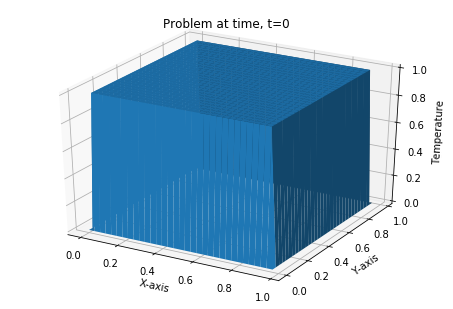

In [78]:
fig = plt.figure()
ax = Axes3D(fig)
dx = (right-left) / (N[-1]+2)
x = np.arange(left, right, dx)
y = np.arange(down, up, dx)
X, Y = np.meshgrid(x, y)


plt.title('Problem at time, t=0')
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Temperature')

surf=ax.plot_surface(X,Y,T,rstride=1, cstride=1, antialiased=True)
plt.show()

## Von Nuemann Stability Analysis

In numerical analysis, [von Neumann stability analysis](https://en.wikipedia.org/wiki/Von_Neumann_stability_analysis) is a procedure used to check the stability of finite difference schemes as applied to linear partial differential equations.

In [80]:
for Nx in N:
    for dt in dt_all:
        dx = (right-left) / (Nx+1)
    
        if (dt > 0.5*dx*dx):
            print("STABLE  : Explicit Method for Nx="+str(Nx)+" & dt="+str(dt))
        else:
            print("UNSTABLE: Explicit Method for Nx="+str(Nx)+" & dt="+str(dt))

UNSTABLE: Explicit Method for Nx=3 & dt=0.015625
UNSTABLE: Explicit Method for Nx=3 & dt=0.0078125
UNSTABLE: Explicit Method for Nx=3 & dt=0.00048828125
UNSTABLE: Explicit Method for Nx=3 & dt=0.000244140625
STABLE  : Explicit Method for Nx=7 & dt=0.015625
UNSTABLE: Explicit Method for Nx=7 & dt=0.0078125
UNSTABLE: Explicit Method for Nx=7 & dt=0.00048828125
UNSTABLE: Explicit Method for Nx=7 & dt=0.000244140625
STABLE  : Explicit Method for Nx=31 & dt=0.015625
STABLE  : Explicit Method for Nx=31 & dt=0.0078125
UNSTABLE: Explicit Method for Nx=31 & dt=0.00048828125
UNSTABLE: Explicit Method for Nx=31 & dt=0.000244140625


## Explicit Time Stepping
This function is used to solve the finite diffrenece discredisied matrix using an explicit euler formulation.

In [ ]:
explicit={}
def explicitEuler(Nx,T,dt,dx):
    
    tau =dt/(dx*dx);
    Tnew=T;
    Told=T;

    for i=1:(0.5/dt)
    %Defination of Explicit Euler method
    for x=1:Nx+1
            for y=1:Nx+1
                Tnew(x,y)= Told(x,y)+  A*( Told(x-1,y)+Told(x+1,y)+Told(x,y+1)+Told(x,y-1)-4*Told(x,y) );
            end
    end
    Told=Tnew;


## Implicit Time Stepping

In [ ]:
implicit={}
def implicitEuler():